# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimit import limits
import time
import json
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [23]:
# Setup API Calling
# url
url = "http://api.openweathermap.org/data/2.5/weather?"
# url = "https://openweathermap.org/api"

# units
unit = "units=Imperial"

# api
api = "&APPID=" + weather_api_key

# response 
response = requests.get( url + unit + api).json()

# print statement
print(response)

# Storage for api call data
city_info = {"City": [], 
             "Lat": [], 
             "Lng": [],
             "Max Temp": [],
             "Humidity": [],
             "Cloudiness": [],
             "Wind Speed": [],
             "Country": [], 
             "Date": []}

# hint, limit api calls
minute = 60
@limits(calls=60, period=minute)

# api call loop
def call_api():
    
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()
        
        try:
            print("Processing city " + str(i) + ": " + city["name"])
        
            city_info["City"].append(city["name"])
            city_info["Lat"].append(city["coord"]["lat"])
            city_info["Lng"].append(city["coord"]["lon"])
            city_info["Max Temp"].append(city["main"]["temp_max"])
            city_info["Humidity"].append(city["main"]["humidity"])
            city_info["Cloudiness"].append(city["clouds"]["all"])
            city_info["Wind Speed"].append(city["wind"]["speed"])
            city_info["Country"].append(city["sys"]["country"])
            city_info["Date"].append(city["dt"])
            
        except:
            print("Incomplete..., skip over missing city info.")
            pass
    print("Complete")
    
call_api()


            
            
        

{'cod': '400', 'message': 'Nothing to geocode'}
Processing city 0: Hearst
Processing city 1: Atuona
Processing city 2: Albany
Processing city 3: Carnarvon
Processing city 4: Hermanus
Processing city 5: Quatre Cocos
Processing city 6: Hong Kong
Processing city 7: Dali
Processing city 8: Kahului
Processing city 9: Tasiilaq
Processing city 10: Doha
Processing city 11: Bluff
Processing city 12: Cape Town
Processing city 13: Vaini
Processing city 14: Ponta do Sol
Processing city 15: Talcahuano
Incomplete..., skip over missing city info.
Processing city 17: Ushuaia
Processing city 18: Westport
Processing city 19: Vredendal
Processing city 20: Kapaa
Processing city 21: Mastic Beach
Processing city 22: Barra Patuca
Processing city 23: Kavieng
Processing city 24: Nanortalik
Processing city 25: Hambantota
Processing city 26: Broken Hill
Processing city 27: Butaritari
Processing city 28: Dongsheng
Processing city 29: Ribeira Grande
Processing city 30: Busselton
Processing city 31: Los Llanos de A

Incomplete..., skip over missing city info.
Incomplete..., skip over missing city info.
Processing city 264: Plettenberg Bay
Processing city 265: Lincoln
Processing city 266: Portland
Incomplete..., skip over missing city info.
Processing city 268: Souillac
Processing city 269: Itarema
Processing city 270: Tanout
Processing city 271: Mossamedes
Processing city 272: Lebu
Processing city 273: Zabul Province
Processing city 274: Kieta
Processing city 275: Meadow Lake
Processing city 276: Wanaka
Processing city 277: Abhā
Processing city 278: Ostrovnoy
Processing city 279: Kathmandu
Processing city 280: Marawi
Processing city 281: Hofn
Processing city 282: Bowen
Processing city 283: Baruun-Urt
Processing city 284: St. George's
Processing city 285: Santa Rosa
Processing city 286: Oktyabr'skiy
Processing city 287: Luján
Processing city 288: Green River
Processing city 289: Anadyr
Processing city 290: Cidreira
Processing city 291: Bodden Town
Incomplete..., skip over missing city info.
Process

Processing city 518: San Cristobal
Processing city 519: Lere
Processing city 520: Luanda
Processing city 521: Feijó
Incomplete..., skip over missing city info.
Processing city 523: Shiyan
Processing city 524: Parral
Processing city 525: Beşikdüzü
Processing city 526: Pacific Grove
Processing city 527: Solnechnyy
Processing city 528: Yeppoon
Processing city 529: Bandarbeyla
Processing city 530: Gushikawa
Processing city 531: Baza
Processing city 532: Sur
Processing city 533: Gizo Government Station
Processing city 534: Deputatsky
Processing city 535: Umm Kaddadah
Processing city 536: Río Gallegos
Processing city 537: Bāfq
Processing city 538: Chicama
Processing city 539: Noshiro
Processing city 540: Nizhniy Baskunchak
Processing city 541: Gunjur
Incomplete..., skip over missing city info.
Processing city 543: Roncesvalles
Processing city 544: Chizhou
Incomplete..., skip over missing city info.
Processing city 546: Woodstock
Incomplete..., skip over missing city info.
Processing city 548

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Creating DataFrame
city_info_df = pd.DataFrame(city_info)

# Clean DataFrame
city_info_df["Max Temp"] = city_info_df["Max Temp"].replace('', np.nan)
city_info_df = city_info_df.dropna()

city_count = len(city_info_df)
# Export as CSV file
city_info_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Inspect DataFrame
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hearst,49.6835,-83.6665,3.45,96,100,7.36,CA,1644201140
1,Atuona,-9.8000,-139.0333,78.80,77,12,17.09,PF,1644201272
2,Albany,42.6001,-73.9662,21.31,76,10,4.18,US,1644201074
3,Carnarvon,-24.8667,113.6333,78.87,36,6,21.85,AU,1644201272
4,Hermanus,-34.4187,19.2345,65.80,92,66,4.25,ZA,1644201273
...,...,...,...,...,...,...,...,...,...
552,Colares,38.7992,-9.4469,52.79,51,4,5.01,PT,1644201459
553,Zhaoqing,23.0512,112.4597,59.67,91,100,3.44,CN,1644201459
554,Vilhena,-12.7406,-60.1458,69.28,98,100,3.20,BR,1644201460
555,Kaeo,-35.1000,173.7833,77.32,97,99,6.44,NZ,1644201460


In [53]:
leftover_cities = city_info_df.loc[city_info_df["City"] != "Failed!"]
leftover_cities_count = len(leftover_cities)
print("{} number of cities were left out of the {} cities accounted for, giving a success rate of {:.1%} retrieval."
      .format(leftover_cities_count, city_count, (leftover_cities_count/city_count)))

leftover_cities.index = [a for a in range(leftover_cities_count)]

non_numeric_columns = ["City", "Country", "Date"]

for col in leftover_cities.columns:
    if(col not in non_numeric_columns):
        leftover_cities[col] = pd.to_numeric(leftover_cities[col])
        

leftover_cities

557 number of cities were left out of the 557 cities accounted for, giving a success rate of 100.0% retrieval.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hearst,49.6835,-83.6665,3.45,96,100,7.36,CA,1644201140
1,Atuona,-9.8000,-139.0333,78.80,77,12,17.09,PF,1644201272
2,Albany,42.6001,-73.9662,21.31,76,10,4.18,US,1644201074
3,Carnarvon,-24.8667,113.6333,78.87,36,6,21.85,AU,1644201272
4,Hermanus,-34.4187,19.2345,65.80,92,66,4.25,ZA,1644201273
...,...,...,...,...,...,...,...,...,...
552,Colares,38.7992,-9.4469,52.79,51,4,5.01,PT,1644201459
553,Zhaoqing,23.0512,112.4597,59.67,91,100,3.44,CN,1644201459
554,Vilhena,-12.7406,-60.1458,69.28,98,100,3.20,BR,1644201460
555,Kaeo,-35.1000,173.7833,77.32,97,99,6.44,NZ,1644201460


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
# Table Columns
lat = city_info_df["Lat"]
max_temp = city_info_df["Max Temp"]
humidity = city_info_df["Humidity"]
cloudiness = city_info_df["Cloudiness"]
wind_speed = city_info_df["Wind Speed"]

In [29]:
#  Get the indices of cities that have humidity over 100%.
city_info_df["Humidity"]

0      96
1      77
2      76
3      36
4      92
       ..
552    51
553    91
554    98
555    97
556    86
Name: Humidity, Length: 557, dtype: int64

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

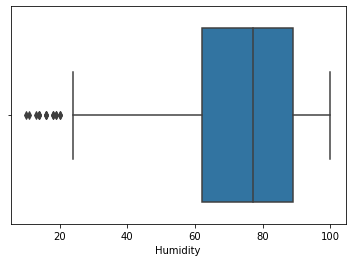

In [30]:
# Couldn't figure out how to use plot_filtered to fix FutureWarning
sns.boxplot(city_info_df["Humidity"])



In [31]:
# Print Outlier (if one exists)
print(np.where(city_info_df["Humidity"] > 100))
# Array is empty, no 'Humidity' over 100% exists in current dataset.

(array([], dtype=int64),)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

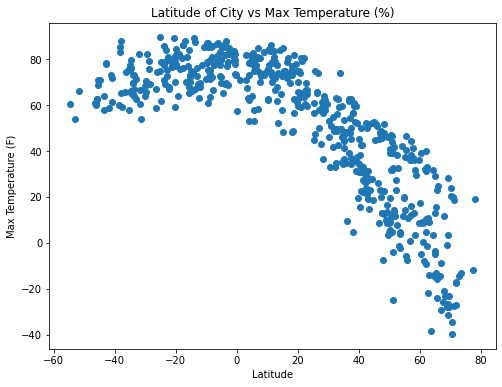

In [32]:
# Latitude vs Temperature
# viz config
plt.figure(figsize=(8,6))
lat_vs_temp = plt.scatter(lat, max_temp, linewidths=1, marker="o")


# titles & labels
plt.title("Latitude of City vs Max Temperature (%)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Display Plot
plt.show()

In [33]:
# Save fig
lat_vs_temp.get_figure().savefig("../Images/Fig1.png")

## Latitude vs. Humidity Plot

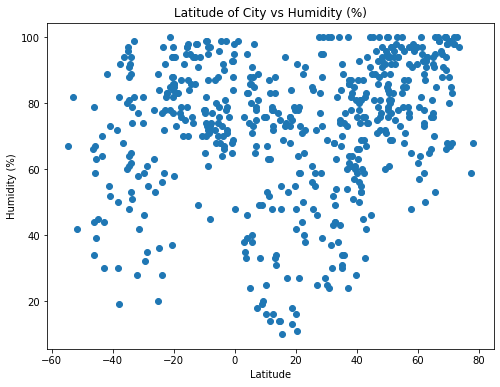

In [34]:
# Latitude vs Humidity
# viz config
plt.figure(figsize=(8,6))
lat_vs_humidity = plt.scatter(lat, humidity, linewidths=1, marker="o")

# titles & labels
plt.title("Latitude of City vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Display Plot
plt.show()

In [35]:
lat_vs_humidity.get_figure().savefig("../Images/Fig2.png")

## Latitude vs. Cloudiness Plot

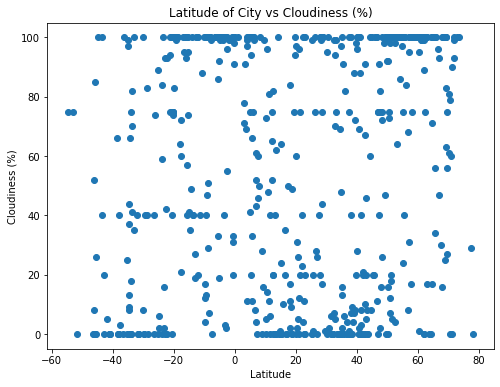

In [36]:
# Latitude vs Cloudiness
# viz config
plt.figure(figsize=(8,6))
lat_vs_cloudiness = plt.scatter(lat, cloudiness, linewidths=1, marker="o")

# titles & labels
plt.title("Latitude of City vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Display Plot
plt.show()

In [37]:
lat_vs_cloudiness.get_figure().savefig("../Images/Fig3.png")

## Latitude vs. Wind Speed Plot

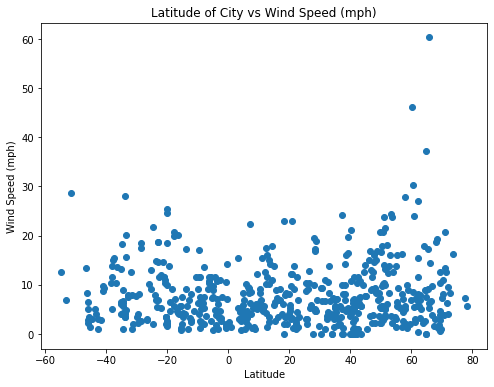

In [38]:
# Latitude vs Cloudiness
# viz config
plt.figure(figsize=(8,6))
lat_vs_wind_speed = plt.scatter(lat, wind_speed, linewidths=1, marker="o")

# titles & labels
plt.title("Latitude of City vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Display Plot
plt.show()

In [39]:
lat_vs_wind_speed.get_figure().savefig("../Images/Fig4.png")

## Linear Regression

In [65]:
# Linear Regression
def makeLinRegression(city_info_df, x_Col, y_Col):
    # preform linear regression
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(city_info_df[x_Col], city_info_df[y_Col])
    # setup x and y axis data for linear regression 
    x = np.array([a for a in range(int(min(city_info_df[x_Col].values)), int(max(city_info_df[x_Col].values)+1))])
    y = regr_slope * x + regr_intercept
    # scatter plot
    axis_df = city_info_df.plot(kind="scatter", x=x_Col, y=y_Col, title="{} vs {} ({})")
    # best fit line
    axis_df.plot(x, y, 'r')
    
    # print statements
    print("Equation for best-fit linear regression line is y={:.2f}x+{:.2f}".format(regr_slope, regr_intercept))
    
    print("r-squared correlation coefficient is {:.2f}".format(regr_r_val))
    
    # return statement
    return axis_df

In [66]:
# Northern and Southern Hemispheres

# Northern Hemisphere DataFrame
northern_hemisphere = city_info_df.loc[city_info_df["Lat"] >= 0]
# Count of Cities in the Northern Hemisphere
northern_count = len(northern_hemisphere)
# Print 
print("The northern hemisphere has {} cities out of {} total, accounting for {:.1%} of cities in the dataset."
      .format(northern_count, city_count, (northern_count/city_count)))

# Southern Hemisphere DataFrame
southern_hemisphere = city_info_df.loc[city_info_df["Lat"] < 0]
# Count of Cities in the Southern Hemisphere
southern_count = len(southern_hemisphere)
# Print 
print("The southern hemisphere has {} cities out of {} total, accounting for {:.1%} of cities in the dataset."
      .format(southern_count, city_count, (southern_count/city_count)))

The northern hemisphere has 371 cities out of 557 total, accounting for 66.6% of cities in the dataset.
The southern hemisphere has 186 cities out of 557 total, accounting for 33.4% of cities in the dataset.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Line of Best-Fit for linear regression is y=-1.31x+89.14
The r-squared correlation coefficient is -0.87


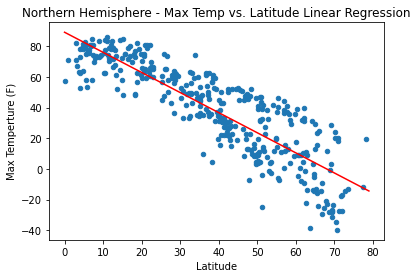

In [77]:
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemisphere["Lat"],
                                                                 northern_hemisphere["Max Temp"])

x = np.array([a for a in range(80)])
y = n_temp_slope * x + n_temp_intercept

n_temp_axes = northern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                                       title="Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
# line of best fit
n_temp_axes.plot(x, y, 'r')

plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")

# print 
print("Line of Best-Fit for linear regression is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient is {:.2f}".format(n_temp_r_val))

# save fig
n_temp_axes.get_figure().savefig("../Images/Fig5_N.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.30x+80.54
r-squared correlation coefficient is 0.50


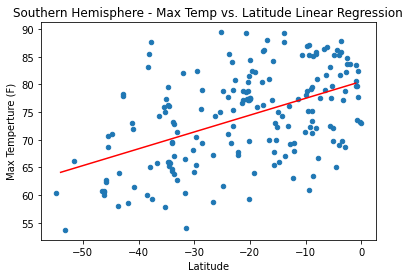

In [75]:
s_temp_axes = makeLinRegression(southern_hemisphere, "Lat", "Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")
s_temp_axes.get_figure().savefig("../Images/Fig6_S.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.50x+52.84
r-squared correlation coefficient is 0.45


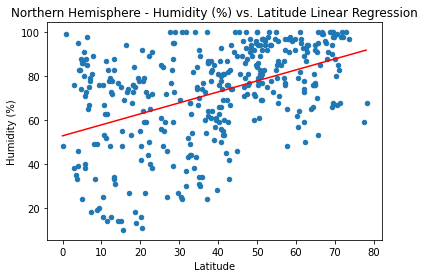

In [79]:
n_humidity_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
n_humidity_lat_axes.get_figure().savefig("../Images/Fig7_N.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.51x+85.21
r-squared correlation coefficient is 0.38


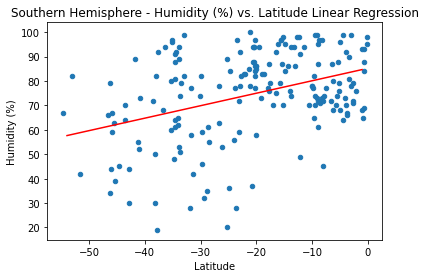

In [80]:
s_humidity_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
s_humidity_lat_axes.get_figure().savefig("../Images/Fig8_S.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.50x+34.37
r-squared correlation coefficient is 0.24


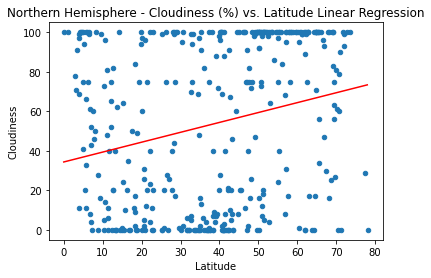

In [82]:
n_cloudiness_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
n_cloudiness_lat_axes.get_figure().savefig("../Images/Fig9_N.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=1.28x+83.64
r-squared correlation coefficient is 0.43


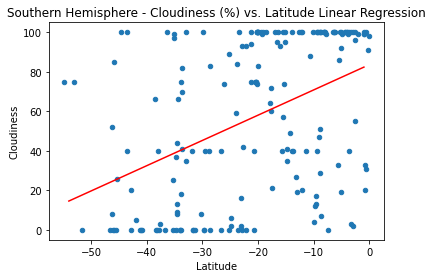

In [83]:
s_cloudiness_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
s_cloudiness_lat_axes.get_figure().savefig("../Images/Fig10_S.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.06x+5.63
r-squared correlation coefficient is 0.17


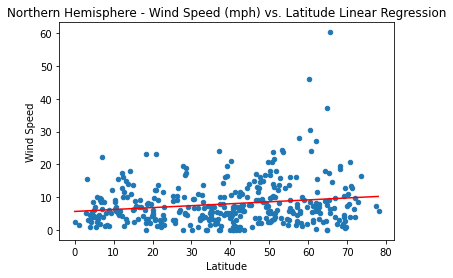

In [84]:
n_wind_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
n_wind_lat_axes.get_figure().savefig("../Images/Fig11_N.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=-0.06x+6.39
r-squared correlation coefficient is -0.15


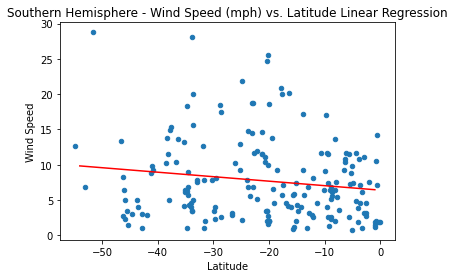

In [85]:
s_wind_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
s_wind_lat_axes.get_figure().savefig("../Images/Fig12_S.png")